In [12]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
fr_trans = pd.read_csv("C:/Users/hp/Downloads/fraud transaction detection.csv")

In [15]:
fr_trans.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [16]:
fr_trans.tail(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048560,95,CASH_IN,113412.53,C928894150,41533.00,154945.53,C1668344599,565908.33,452495.80,0,0
1048561,95,DEBIT,7880.88,C233708423,31489.00,23608.12,C794801857,18700000.00,18700000.00,0,0
1048562,95,CASH_IN,37644.42,C1182362327,102.00,37746.42,C2108562529,21209.96,0.00,0,0
1048563,95,PAYMENT,9414.75,C1206481903,20216.00,10801.25,M512470056,0.00,0.00,0,0
1048564,95,PAYMENT,5227.49,C1665445469,21184.00,15956.51,M1852202800,0.00,0.00,0,0
1048565,95,TRANSFER,132387.24,C1654402840,15956.51,0.00,C1878219072,631284.08,763671.32,0,0
1048566,95,PAYMENT,12598.15,C565523855,30601.00,18002.85,M1740980642,0.00,0.00,0,0
1048567,95,CASH_OUT,279674.05,C990252469,18002.85,0.00,C574439165,1847488.28,2127162.32,0,0
1048568,95,PAYMENT,20721.54,C954269986,49732.00,29010.46,M812667644,0.00,0.00,0,0
1048569,95,PAYMENT,3210.11,C2113264897,11113.00,7902.89,M1989479599,0.00,0.00,0,0


In [17]:
fr_trans.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

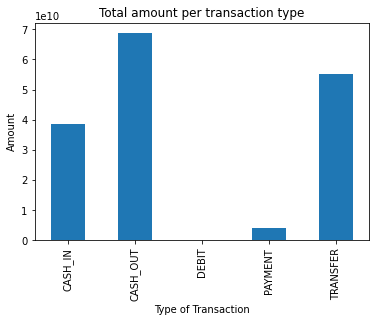

In [18]:
var = fr_trans.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [19]:
df=pd.DataFrame(fr_trans)
print(df.max())

step                      95
type                TRANSFER
amount            10000000.0
nameOrig          C999999254
oldbalanceOrg     38900000.0
newbalanceOrig    38900000.0
nameDest          M999996397
oldbalanceDest    42100000.0
newbalanceDest    42200000.0
isFraud                    1
isFlaggedFraud             0
dtype: object


In [20]:
print("Single column value using dataframe.dot")
print(df['type'].unique())

Single column value using dataframe.dot
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [21]:
print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates()))) 
                                                            # only 'TRANSFER'

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nMin amount transacted when isFlaggedFraud is set= {}'\
      .format(dfFlagged.amount.min()))

print('\nMax amount transacted in a TRANSFER where isFlaggedFraud is not set=\
{}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()))

print('\nMax amount transacted in a CASH_IN where isFlaggedFraud is set=\
{}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()))


The type of transactions in which isFlaggedFraud is set: []

Min amount transacted when isFlaggedFraud is set= nan

Max amount transacted in a TRANSFER where isFlaggedFraud is not set=10000000.0

Max amount transacted in a CASH_IN where isFlaggedFraud is set=10000000.0


In [22]:
piedata = fr_trans.groupby(['isFlaggedFraud']).sum()

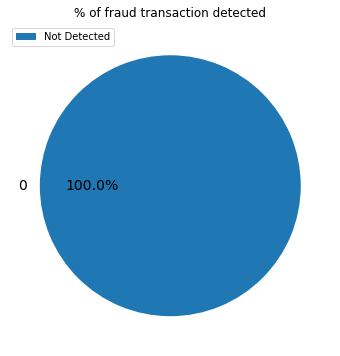

In [23]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

In [24]:
fr_trans.drop(['nameOrig','nameDest'],inplace=True,axis=1)

In [25]:
fr_trans.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [26]:
df.loc[df['isFlaggedFraud'] == 0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [27]:
df=pd.DataFrame(fr_trans)
print(df.max())

step                      95
type                TRANSFER
amount            10000000.0
oldbalanceOrg     38900000.0
newbalanceOrig    38900000.0
oldbalanceDest    42100000.0
newbalanceDest    42200000.0
isFraud                    1
isFlaggedFraud             0
dtype: object


In [28]:
fr_trans['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [29]:
fr_trans['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [30]:
fr_trans.loc[fr_trans.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [31]:
fraud = fr_trans[fr_trans['isFraud'] == 1]
nonfraud = fr_trans[fr_trans['isFraud'] == 0]
outlierFraction = len(fraud)/float(len(nonfraud))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fr_trans[fr_trans['isFraud'] == 1])))
print('nonfraud cases: {}'.format(len(fr_trans[fr_trans['isFraud'] == 0])))

0.0010902845337124188
Fraud Cases: 1142
nonfraud cases: 1047433


In [32]:
df.loc[df['isFraud'] == 1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,56745.14,0.0,51433.88,108179.02,1,0
1048221,95,TRANSFER,33676.59,33676.59,0.0,0.00,0.00,1,0
1048222,95,CASH_OUT,33676.59,33676.59,0.0,0.00,33676.59,1,0
1048323,95,TRANSFER,87999.25,87999.25,0.0,0.00,0.00,1,0


In [33]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout)))


 The number of fraudulent TRANSFERs = 564

 The number of fraudulent CASH_OUTs = 578


In [34]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

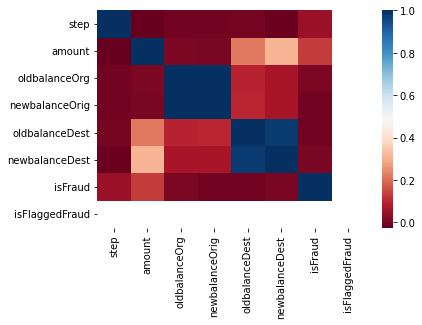

In [35]:
sns.heatmap(fr_trans.corr(),cmap='RdBu',);

In [39]:
X=fr_trans[['step','type','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=fr_trans[['isFraud']]

In [40]:
X.shape

(1048575, 6)

In [41]:
X.info

<bound method DataFrame.info of          step      type  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1   PAYMENT      170136.00       160296.36            0.00   
1           1   PAYMENT       21249.00        19384.72            0.00   
2           1  TRANSFER         181.00            0.00            0.00   
3           1  CASH_OUT         181.00            0.00        21182.00   
4           1   PAYMENT       41554.00        29885.86            0.00   
...       ...       ...            ...             ...             ...   
1048570    95  CASH_OUT      479803.00       347245.65       484329.37   
1048571    95   PAYMENT       90545.00        80627.64            0.00   
1048572    95   PAYMENT       20545.00         6404.95            0.00   
1048573    95   PAYMENT       90605.00        80584.95            0.00   
1048574    95   PAYMENT       80584.95        69134.92            0.00   

         newbalanceDest  
0                  0.00  
1                  0.00  
2

In [42]:
X1=pd.get_dummies(X)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X1)
scaled_data=scaler.transform(X1)

In [44]:
x1= pd.DataFrame(scaled_data)
x1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.004374,0.004121,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.000546,0.000498,0.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000005,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000005,0.000000,0.000503,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.001068,0.000768,0.000000,0.0,0.0,0.0,0.0,1.0,0.0


(array([1.03067e+06, 1.46790e+04, 2.62200e+03, 4.56000e+02, 6.20000e+01,
        2.80000e+01, 1.20000e+01, 1.60000e+01, 6.00000e+00, 2.40000e+01]),
 array([1.00000000e-01, 1.00000009e+06, 2.00000008e+06, 3.00000007e+06,
        4.00000006e+06, 5.00000005e+06, 6.00000004e+06, 7.00000003e+06,
        8.00000002e+06, 9.00000001e+06, 1.00000000e+07]),
 <BarContainer object of 10 artists>)

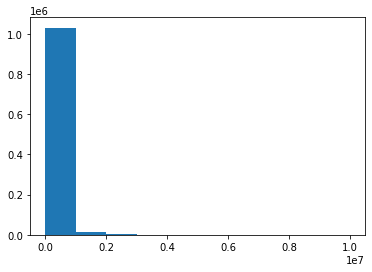

In [45]:
plt.hist(fr_trans.amount)

(array([1.08717e+05, 3.83766e+05, 8.38590e+04, 1.88936e+05, 2.58522e+05,
        6.53500e+03, 1.44000e+02, 1.26000e+02, 1.02000e+02, 1.78680e+04]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <BarContainer object of 10 artists>)

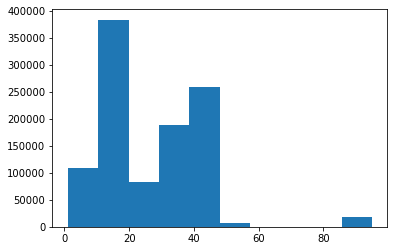

In [46]:
plt.hist(fr_trans.step)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

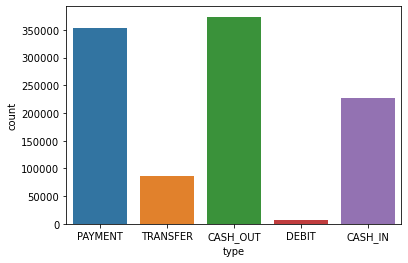

In [47]:
sns.countplot(fr_trans.type)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

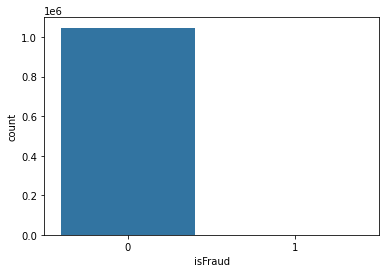

In [48]:
sns.countplot(fr_trans.isFraud)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

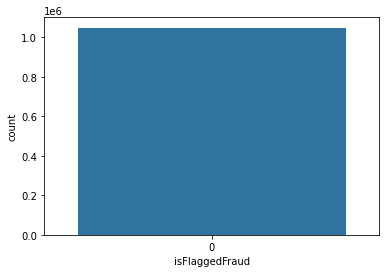

In [49]:
sns.countplot(fr_trans.isFlaggedFraud)

<h2>Machine Learning Models</h2>

In [50]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X1,y,train_size = 0.8, test_size = 0.2, random_state = 50)

<h2>Linear Regression</h2>

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model=LinearRegression().fit(train_X,train_y)

In [53]:
predicted_y = model.predict(test_X)

In [54]:
model.score(test_X,test_y)

0.11853990981606144

<h2>Logistic Regression</h2>

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(train_X,train_y)
model.score(test_X,test_y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9987411487018096

In [56]:
predicted_value=model.predict(test_X)
print(predicted_value)

[0 0 0 ... 0 0 0]


In [57]:
probability=model.predict_proba(test_X)
print(probability)

[[1.00000000e+000 4.22544731e-078]
 [1.00000000e+000 2.22223985e-013]
 [1.00000000e+000 2.63955368e-090]
 ...
 [9.99999127e-001 8.73057583e-007]
 [9.99984201e-001 1.57989448e-005]
 [1.00000000e+000 1.10670517e-129]]


In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(test_y,predicted_value)

array([[209393,     70],
       [   194,     58]], dtype=int64)

<h2>RandomForestClassifier</h2>

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [61]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [62]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.7862609184212082


<h2>DecisionTree Classifier</h2>

In [63]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(train_X,train_y)
predicted=classifier.predict(test_X)
print("\npredicted values :\n",predicted)


predicted values :
 [0 0 0 ... 0 0 0]


DT = metrics.accuracy_score(test_y, predicted) * 100
print("\nThe accuracy score using the DecisionTreeClassifier : ",DT)

In [64]:
model3=DecisionTreeRegressor().fit(train_X,train_y)
print("Test Score =",model3.score(test_X,test_y))

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
predicted_y = model.predict(test_X)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') #linear kernel
clf.fit(train_X,train_y)
clf.score(test_X,test_y)

<h2>GradientBoosting Regression</h2>

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model4.fit(train_X, train_y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(random_state=0)

In [66]:
model4.score(test_X,test_y)

0.6732770796955392

<h2>AdaBoost Regression</h2>

In [67]:
from sklearn.ensemble import AdaBoostRegressor
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(train_X, train_y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(n_estimators=100, random_state=0)

In [68]:
regress.score(train_X,train_y)

0.5200065575212742

In [69]:
regress.score(test_X,test_y)

0.5062378975714048

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') #linear kernel
clf.fit(train_X,train_y)
clf.score(test_X,test_y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
pred_svm = SVM.predict(test_X)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(train_y,pred_y)